In [ ]:
!pip install pyyaml==5.1
# workaround: install old version of pytorch since detectron2 hasn't released packages for pytorch 1.9 (issue: https://github.com/facebookresearch/detectron2/issues/3158)
!pip install torch==1.8.0+cu101 torchvision==0.9.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

# install detectron2 that matches pytorch 1.8
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

Looking in links: https://download.pytorch.org/whl/torch_stable.html
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html


In [ ]:
# check pytorch installation: 
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
assert torch.__version__.startswith("1.8")   # please manually install torch 1.8 if Colab changes its default version

1.8.0+cu101 True


In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog


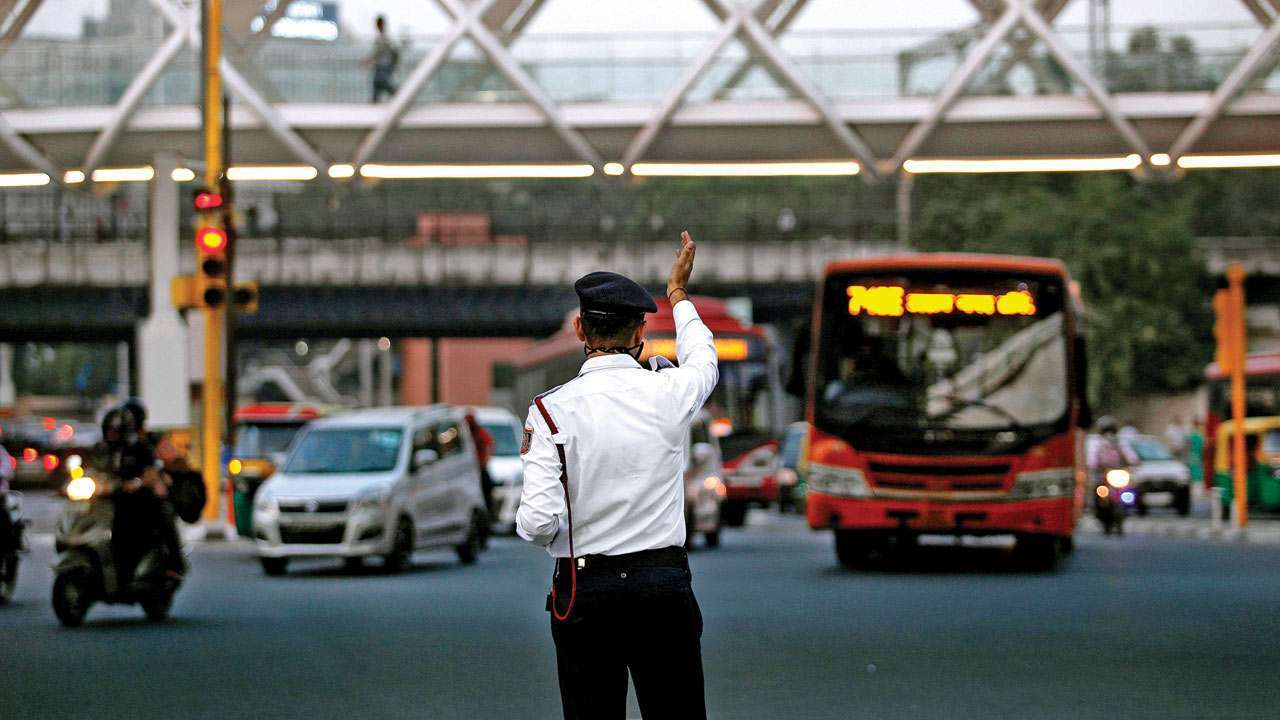

In [ ]:
!wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg
im = cv2.imread("/content/1.jpg")
cv2_imshow(im)

In [ ]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

model_final_f10217.pkl: 178MB [00:02, 86.0MB/s]                           


In [ ]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([ 0,  5,  3,  2,  0,  2,  0,  9,  2,  0,  2,  2,  2,  0,  3, 24,  2,  7,
         0,  0], device='cuda:0')
Boxes(tensor([[5.1612e+02, 2.3310e+02, 7.3069e+02, 7.1884e+02],
        [7.8872e+02, 2.5826e+02, 1.0934e+03, 5.7448e+02],
        [4.6949e+01, 4.8084e+02, 1.9088e+02, 6.2926e+02],
        [1.1018e+03, 4.3132e+02, 1.1925e+03, 5.1832e+02],
        [9.0348e+01, 4.0048e+02, 1.7204e+02, 5.9062e+02],
        [7.1630e+02, 4.3484e+02, 7.9508e+02, 5.2374e+02],
        [1.0821e+03, 4.1592e+02, 1.1318e+03, 5.3676e+02],
        [1.9342e+02, 2.2069e+02, 2.2874e+02, 3.1016e+02],
        [4.6842e+02, 4.0982e+02, 5.2527e+02, 5.2656e+02],
        [3.6645e+02, 1.6776e+01, 4.0001e+02, 1.0533e+02],
        [2.5217e+02, 4.0272e+02, 4.9734e+02, 5.7803e+02],
        [2.2074e+00, 4.2197e+02, 7.5389e+01, 4.8824e+02],
        [2.2370e+02, 4.0965e+02, 3.1932e+02, 5.3529e+02],
        [1.5471e+02, 4.3283e+02, 2.0779e+02, 5.4358e+02],
        [7.2610e-01, 4.8230e+02, 3.2369e+01, 6.0653e+02],
        [1

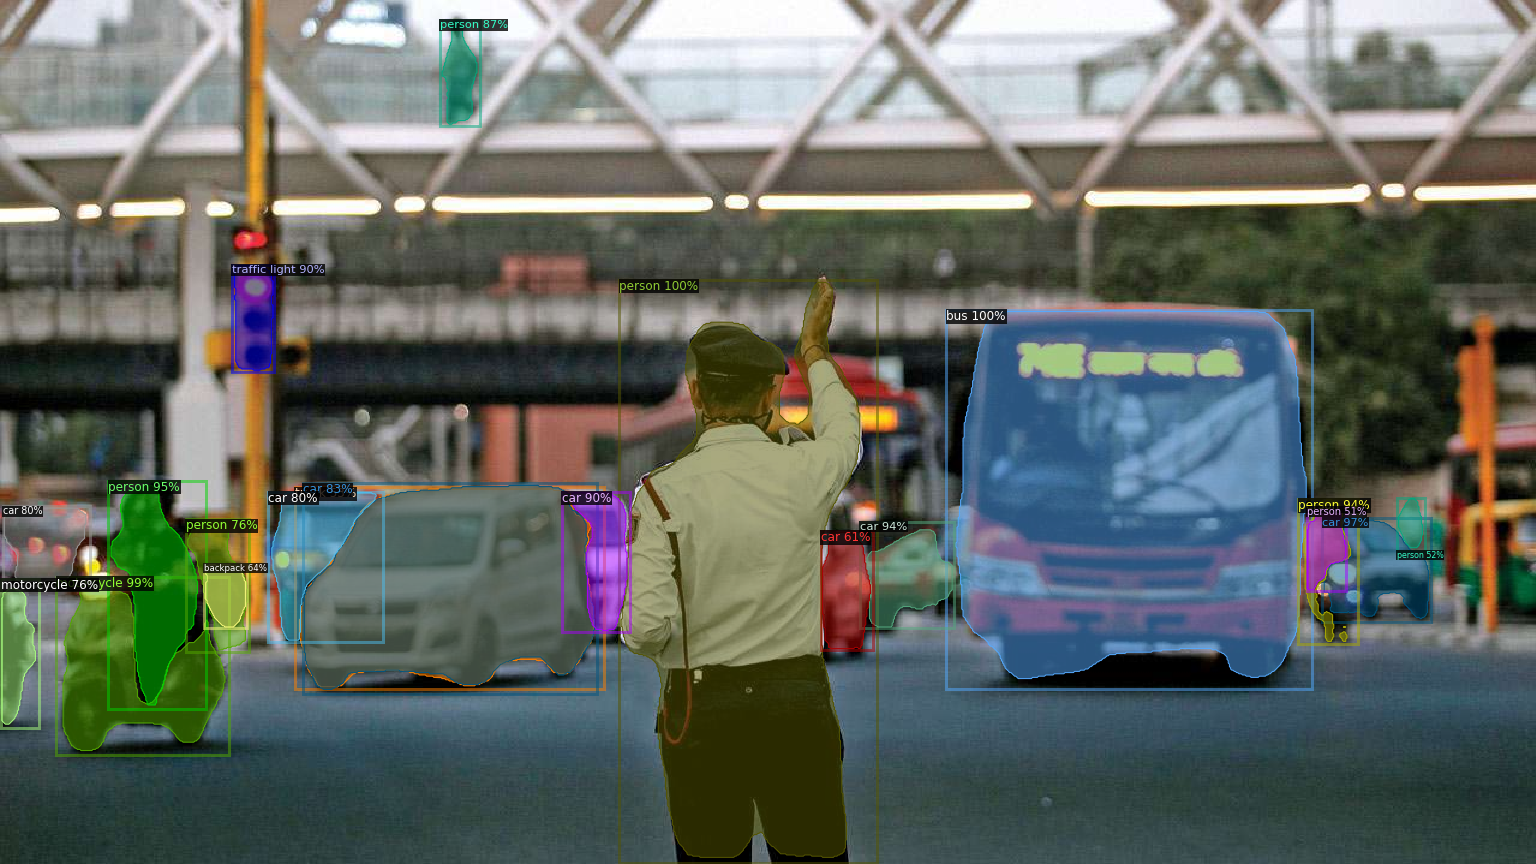

In [ ]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])